In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
df = pd.read_excel("Cap project.xls", engine="xlrd")
df.head()

,Tanggal1,Banten,Tanggal2,Jakarta,Tanggal3,Jabar,Tanggal4,Jateng,Tanggal5,Yogyakarta,Tanggal6,Jatim
0,2019-01-01,10300.0,2019-01-01,12050,2019-01-01,12000,2019-01-01,11500.0,2019-01-01,11400,2019-01-01,11500
1,2019-02-01,10650.0,2019-02-01,12250,2019-02-01,12400,2019-02-01,11500.0,2019-02-01,11400,2019-02-01,11500
2,2019-03-01,10600.0,2019-03-01,12100,2019-03-01,12500,2019-03-01,11500.0,2019-03-01,11250,2019-03-01,11500
3,2019-04-01,10400.0,2019-04-01,12050,2019-04-01,12400,2019-04-01,11500.0,2019-04-01,11250,2019-04-01,11500
4,2019-05-01,10250.0,2019-05-01,11850,2019-05-01,12150,2019-05-01,11250.0,2019-05-01,11000,2019-05-01,11500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tanggal1     60 non-null     datetime64[ns]
 1   Banten       60 non-null     float64       
 2   Tanggal2     60 non-null     datetime64[ns]
 3   Jakarta      60 non-null     int64         
 4   Tanggal3     60 non-null     datetime64[ns]
 5   Jabar        60 non-null     int64         
 6   Tanggal4     60 non-null     datetime64[ns]
 7   Jateng       60 non-null     float64       
 8   Tanggal5     60 non-null     datetime64[ns]
 9   Yogyakarta   60 non-null     int64         
 10  Tanggal6     60 non-null     datetime64[ns]
 11  Jatim        60 non-null     int64         
dtypes: datetime64[ns](6), float64(2), int64(4)
memory usage: 5.8 KB


In [4]:
df.isnull().sum()

Tanggal1       0
Banten         0
Tanggal2       0
Jakarta        0
Tanggal3       0
Jabar          0
Tanggal4       0
Jateng         0
Tanggal5       0
Yogyakarta     0
Tanggal6       0
Jatim          0
dtype: int64

## BANTEN

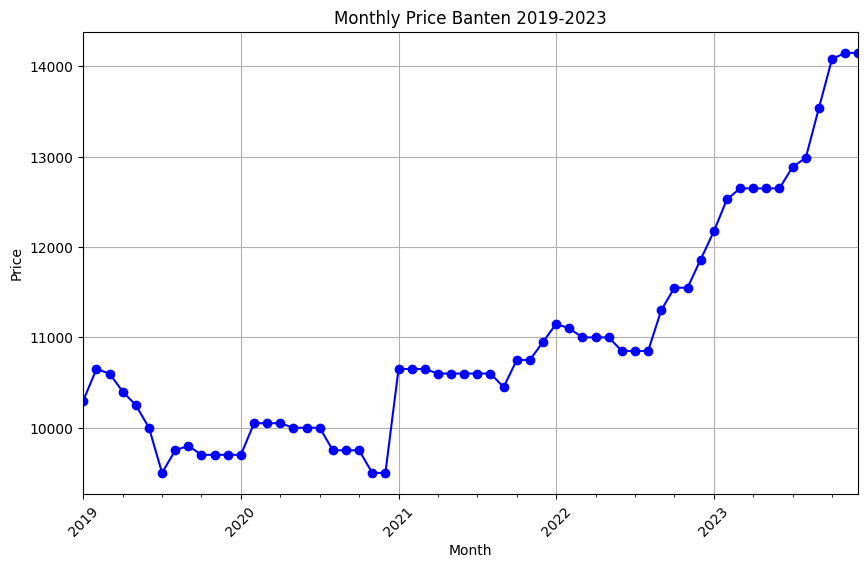

In [5]:
# Plot Harga Beras di Banten
monthly_price_ban = df.groupby(df['Tanggal1'].dt.to_period('M'))['Banten'].sum()
plt.figure(figsize=(10, 6))
monthly_price_ban.plot(kind='line', marker='o', color='b')
plt.title('Monthly Price Banten 2019-2023')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

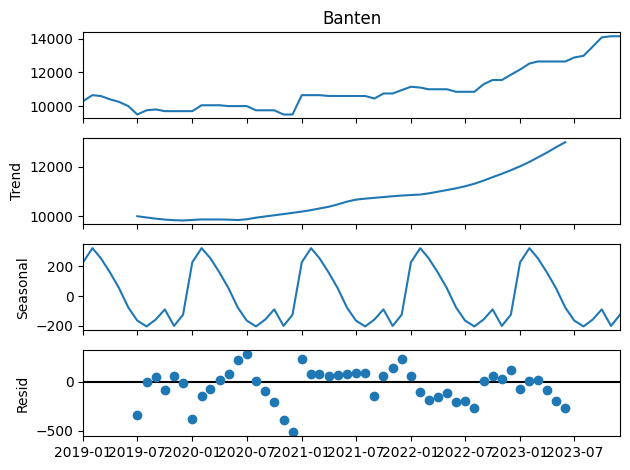

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
df.set_index('Tanggal1', inplace=True)

# Fokus pada data Jakarta
banten = df['Banten']

# Decompose data
result = seasonal_decompose(banten)

# Plot hasil decomposition
result.plot()
plt.show()

c:\Users\naila\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


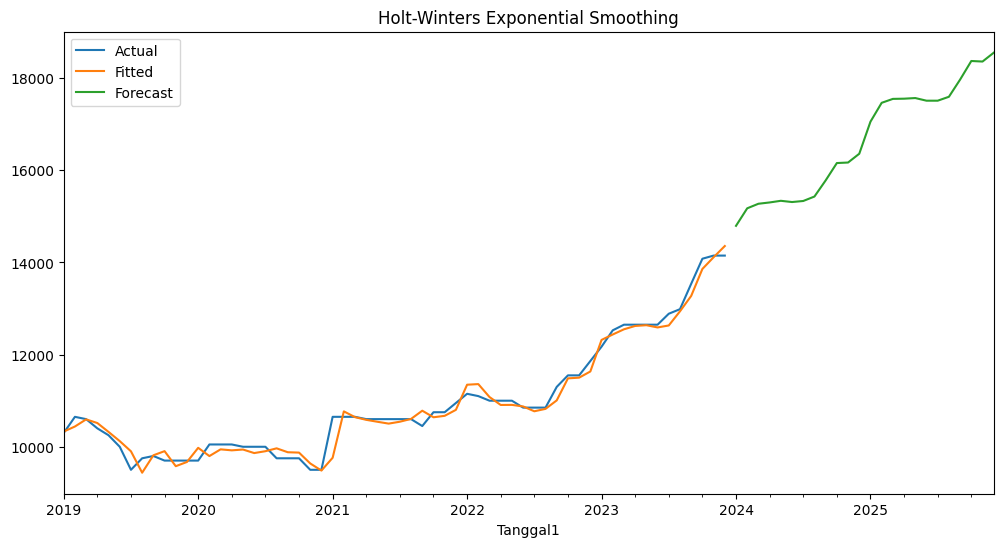

In [54]:
# Split data untuk training
train = banten.iloc[:60]

# Model Holt-Winters
model = ExponentialSmoothing(
    train,
    seasonal='mul',  # Gunakan 'add' atau 'mul'
    seasonal_periods=12,
    trend='add'
).fit()

# Plot
plt.figure(figsize=(12, 6))
train.plot(label='Actual', legend=True)
model.fittedvalues.plot(label='Fitted', legend=True)
model.forecast(24).plot(label='Forecast', legend=True)
plt.title("Holt-Winters Exponential Smoothing")
plt.show()

In [55]:
# Menghitung nilai fitted dan actual
fitted_values = model.fittedvalues
actual_values = train

# Menghitung MAPE
mape = np.mean(np.abs((actual_values - fitted_values) / actual_values)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 1.27%


In [56]:
# Forecast untuk 24 bulan ke depan
forecast_values = model.forecast(24)

# Print hasil forecast
print("Forecast untuk 24 bulan ke depan:")
print(forecast_values)

Forecast untuk 24 bulan ke depan:
2024-01-01    14795.928428
2024-02-01    15176.266928
2024-03-01    15275.224673
2024-04-01    15303.369187
2024-05-01    15339.289832
2024-06-01    15312.450839
2024-07-01    15335.192415
2024-08-01    15432.019922
2024-09-01    15781.852582
2024-10-01    16158.760009
2024-11-01    16170.194044
2024-12-01    16360.669742
2025-01-01    17056.910821
2025-02-01    17466.208561
2025-03-01    17551.476106
2025-04-01    17555.843394
2025-05-01    17569.693717
2025-06-01    17512.296563
2025-07-01    17512.241674
2025-08-01    17597.200373
2025-09-01    17970.526053
2025-10-01    18374.101600
2025-11-01    18362.061414
2025-12-01    18553.585284
Freq: MS, dtype: float64


## JAKARTA

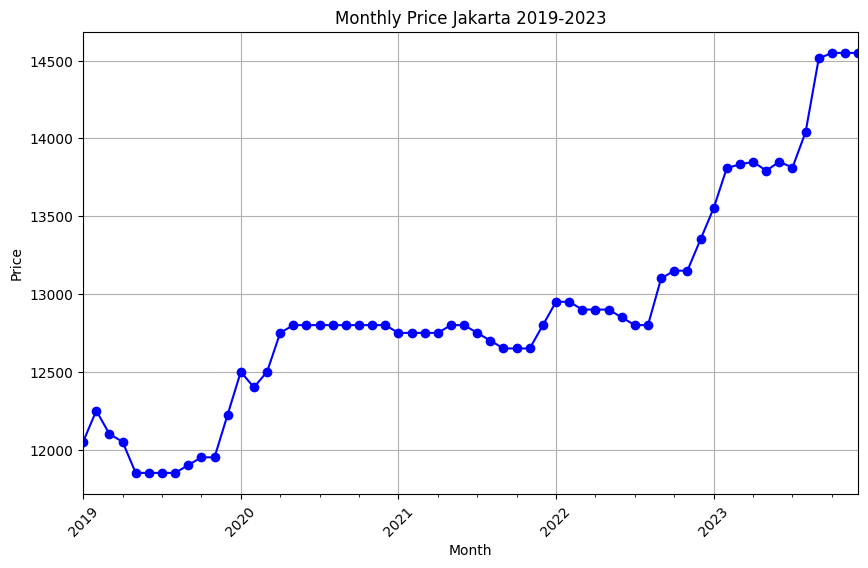

In [10]:
# Plot Harga Beras di Jakarta
monthly_price_jak = df.groupby(df['Tanggal2'].dt.to_period('M'))['Jakarta'].sum()
plt.figure(figsize=(10, 6))
monthly_price_jak.plot(kind='line', marker='o', color='b')
plt.title('Monthly Price Jakarta 2019-2023')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

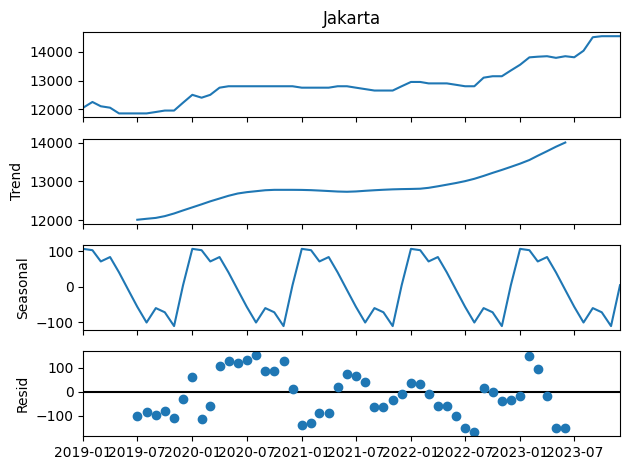

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
df.set_index('Tanggal2', inplace=True)

# Fokus pada data Jakarta
jakarta = df['Jakarta']

# Decompose data
result = seasonal_decompose(jakarta)

# Plot hasil decomposition
result.plot()
plt.show()

c:\Users\naila\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


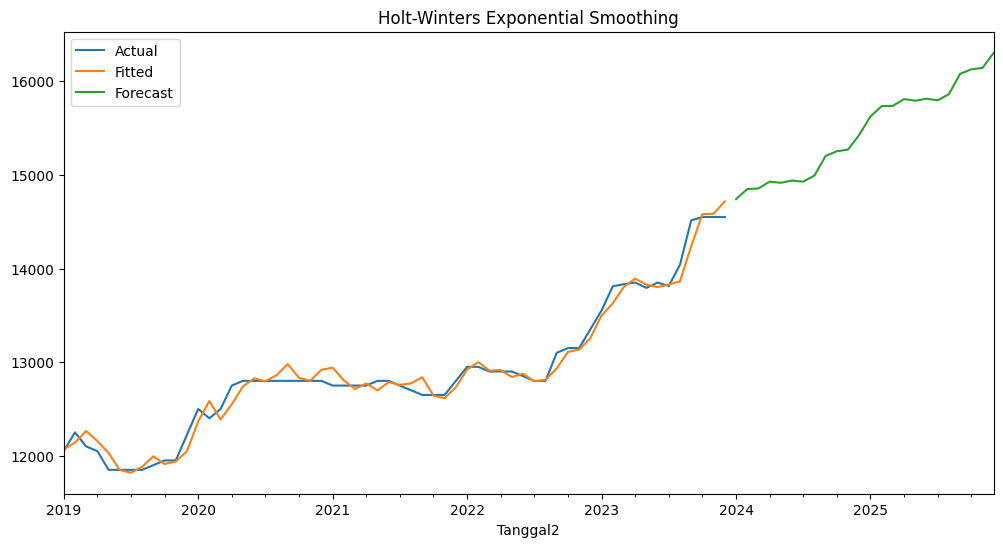

In [57]:
# Split data untuk training
train = jakarta.iloc[:60]

# Model Holt-Winters
model = ExponentialSmoothing(
    train,
    seasonal='mul',  # Gunakan 'add' atau 'mul'
    seasonal_periods=12,
    trend='add'
).fit()

# Plot
plt.figure(figsize=(12, 6))
train.plot(label='Actual', legend=True)
model.fittedvalues.plot(label='Fitted', legend=True)
model.forecast(24).plot(label='Forecast', legend=True)
plt.title("Holt-Winters Exponential Smoothing")
plt.show()



In [58]:
# Menghitung nilai fitted dan actual
fitted_values = model.fittedvalues
actual_values = train

# Menghitung MAPE
mape = np.mean(np.abs((actual_values - fitted_values) / actual_values)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 0.58%


In [59]:
# Forecast untuk 24 bulan ke depan
forecast_values = model.forecast(24)

# Print hasil forecast
print("Forecast untuk 24 bulan ke depan:")
print(forecast_values)
df_forecast1 = pd.DataFrame(forecast_values)
# Menyimpan DataFrame ke file CSV (opsional)
df_forecast1.to_csv('forecast_24_months.csv', index=False)

Forecast untuk 24 bulan ke depan:
2024-01-01    14740.220962
2024-02-01    14848.650558
2024-03-01    14855.352436
2024-04-01    14928.022447
2024-05-01    14915.475343
2024-06-01    14939.538376
2024-07-01    14927.714004
2024-08-01    14993.390572
2024-09-01    15202.207540
2024-10-01    15252.443314
2024-11-01    15270.166565
2024-12-01    15427.810498
2025-01-01    15624.178905
2025-02-01    15734.683045
2025-03-01    15737.398788
2025-04-01    15810.019533
2025-05-01    15792.413404
2025-06-01    15813.608699
2025-07-01    15796.854934
2025-08-01    15862.140286
2025-09-01    16078.823809
2025-10-01    16127.750242
2025-11-01    16142.319670
2025-12-01    16304.793349
Freq: MS, dtype: float64


## JAWA BARAT

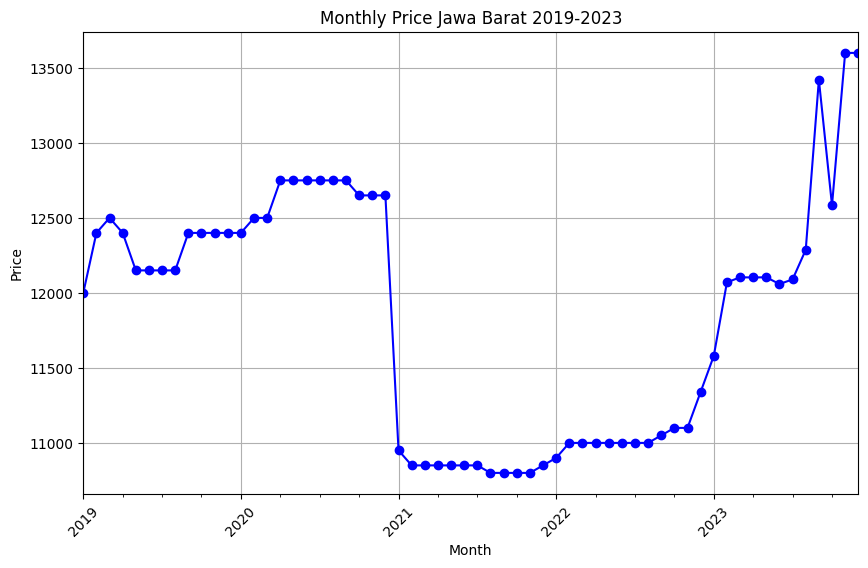

In [15]:
# Plot Harga Beras di Jawa Barat
monthly_price_jab = df.groupby(df['Tanggal3'].dt.to_period('M'))['Jabar'].sum()
plt.figure(figsize=(10, 6))
monthly_price_jab.plot(kind='line', marker='o', color='b')
plt.title('Monthly Price Jawa Barat 2019-2023')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

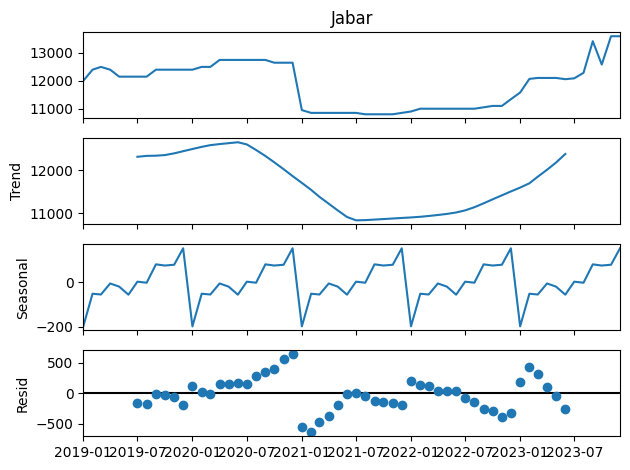

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
df.set_index('Tanggal3', inplace=True)

# Fokus pada data Jakarta
jabar = df['Jabar']

# Decompose data
result = seasonal_decompose(jabar)

# Plot hasil decomposition
result.plot()
plt.show()

c:\Users\naila\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


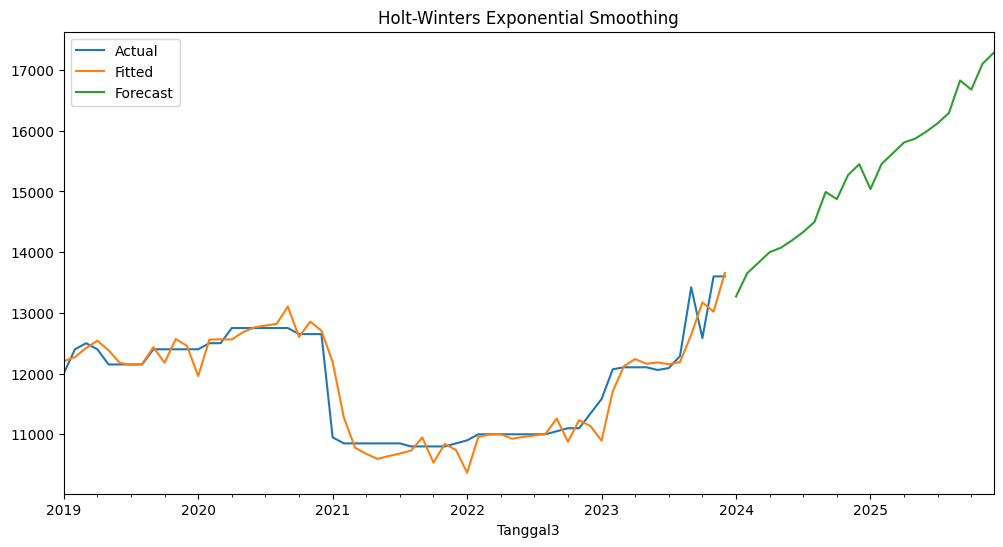

In [65]:
# Split data untuk training
train = jabar.iloc[:60]

# Model Holt-Winters
model = ExponentialSmoothing(
    train,
    seasonal='mul',  # Gunakan 'add' atau 'mul'
    seasonal_periods=12,
    trend= 'add'
).fit()

# Plot
plt.figure(figsize=(12, 6))
train.plot(label='Actual', legend=True)
model.fittedvalues.plot(label='Fitted', legend=True)
model.forecast(24).plot(label='Forecast', legend=True)
plt.title("Holt-Winters Exponential Smoothing")
plt.show()

In [66]:
# Menghitung nilai fitted dan actual
fitted_values = model.fittedvalues
actual_values = train

# Menghitung MAPE
mape = np.mean(np.abs((actual_values - fitted_values) / actual_values)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 1.57%


In [67]:
# Forecast untuk 24 bulan ke depan
forecast_values = model.forecast(24)

# Print hasil forecast
print("Forecast untuk 24 bulan ke depan:")
print(forecast_values)

Forecast untuk 24 bulan ke depan:
2024-01-01    13268.871341
2024-02-01    13652.754450
2024-03-01    13825.318596
2024-04-01    13999.643786
2024-05-01    14072.042943
2024-06-01    14193.402711
2024-07-01    14331.308799
2024-08-01    14496.559936
2024-09-01    14990.892099
2024-10-01    14872.772901
2024-11-01    15268.720371
2024-12-01    15447.951992
2025-01-01    15038.504857
2025-02-01    15453.571246
2025-03-01    15629.070394
2025-04-01    15806.494740
2025-05-01    15868.912091
2025-06-01    15986.686236
2025-07-01    16123.150205
2025-08-01    16290.372655
2025-09-01    16826.940954
2025-10-01    16675.950719
2025-11-01    17101.386866
2025-12-01    17283.768835
Freq: MS, dtype: float64


## JAWA TENGAH

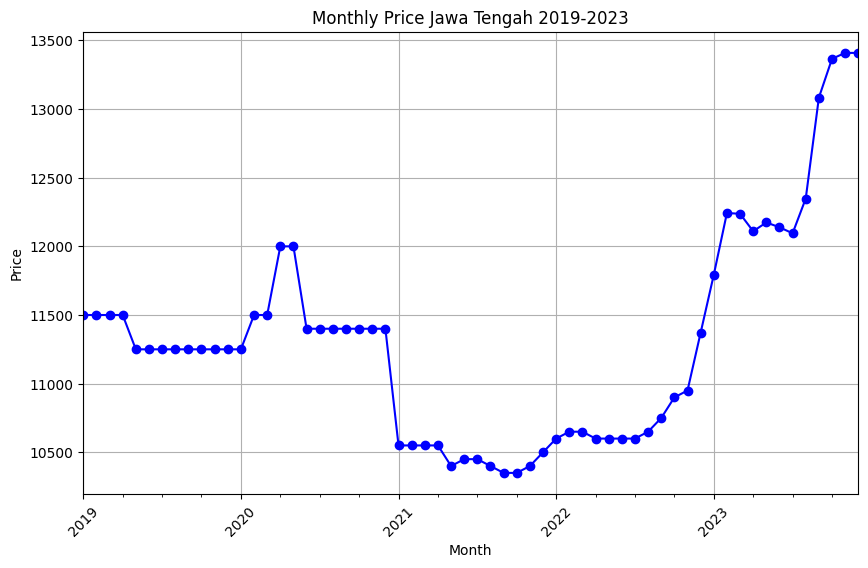

In [20]:
# Plot Harga Beras di Jawa Tengah
monthly_price_jat = df.groupby(df['Tanggal4'].dt.to_period('M'))['Jateng'].sum()
plt.figure(figsize=(10, 6))
monthly_price_jat.plot(kind='line', marker='o', color='b')
plt.title('Monthly Price Jawa Tengah 2019-2023')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

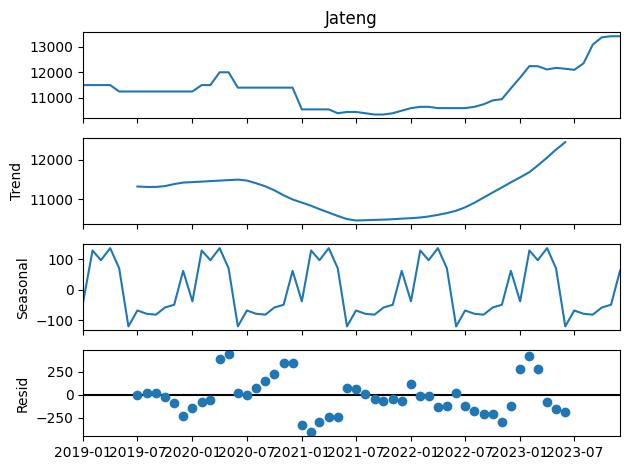

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
df.set_index('Tanggal4', inplace=True)

# Fokus pada data Jawa Tengah
jateng = df['Jateng']

# Decompose data
result = seasonal_decompose(jateng)

# Plot hasil decomposition
result.plot()
plt.show()

c:\Users\naila\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


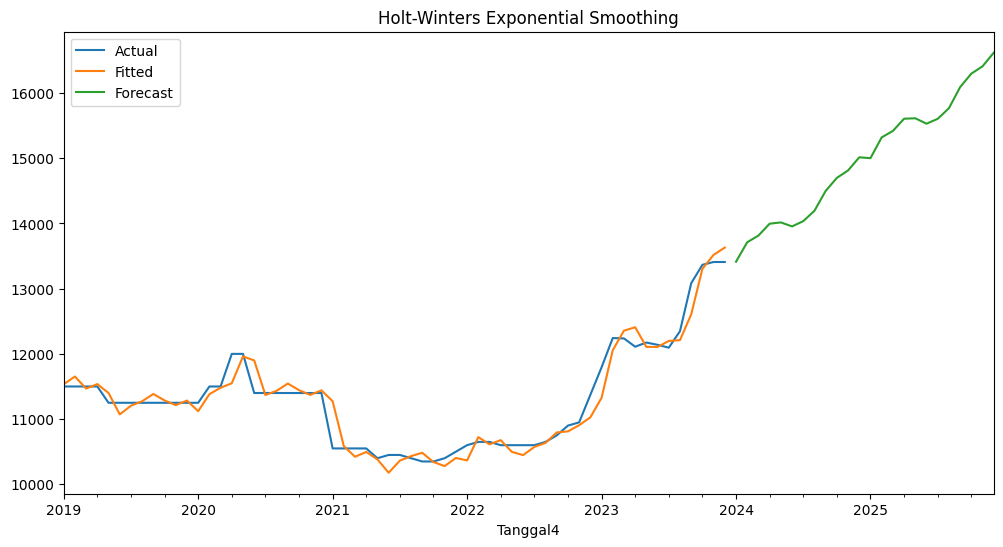

In [22]:
# Split data untuk training
train = jateng.iloc[:60]

# Model Holt-Winters
model = ExponentialSmoothing(
    train,
    seasonal='mul',  # Gunakan 'add' atau 'mul'
    seasonal_periods=12,
    trend='add'
).fit()

# Plot
plt.figure(figsize=(12, 6))
train.plot(label='Actual', legend=True)
model.fittedvalues.plot(label='Fitted', legend=True)
model.forecast(24).plot(label='Forecast', legend=True)
plt.title("Holt-Winters Exponential Smoothing")
plt.show()

In [23]:
# Menghitung nilai fitted dan actual
fitted_values = model.fittedvalues
actual_values = train

# Menghitung MAPE
mape = np.mean(np.abs((actual_values - fitted_values) / actual_values)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 1.13%


In [24]:
# Forecast untuk 24 bulan ke depan
forecast_values = model.forecast(24)

# Print hasil forecast
print("Forecast untuk 24 bulan ke depan:")
print(forecast_values)

Forecast untuk 24 bulan ke depan:
2024-01-01    13413.092543
2024-02-01    13712.032391
2024-03-01    13814.550258
2024-04-01    13996.442869
2024-05-01    14016.300264
2024-06-01    13954.933941
2024-07-01    14035.462678
2024-08-01    14194.630458
2024-09-01    14498.847471
2024-10-01    14699.167228
2024-11-01    14812.983006
2024-12-01    15014.461812
2025-01-01    15001.738914
2025-02-01    15320.212456
2025-03-01    15419.072019
2025-04-01    15606.507243
2025-05-01    15613.339449
2025-06-01    15530.025254
2025-07-01    15604.881584
2025-08-01    15767.193783
2025-09-01    16090.420082
2025-10-01    16298.102833
2025-11-01    16409.824179
2025-12-01    16618.611793
Freq: MS, dtype: float64


## Yogyakarta

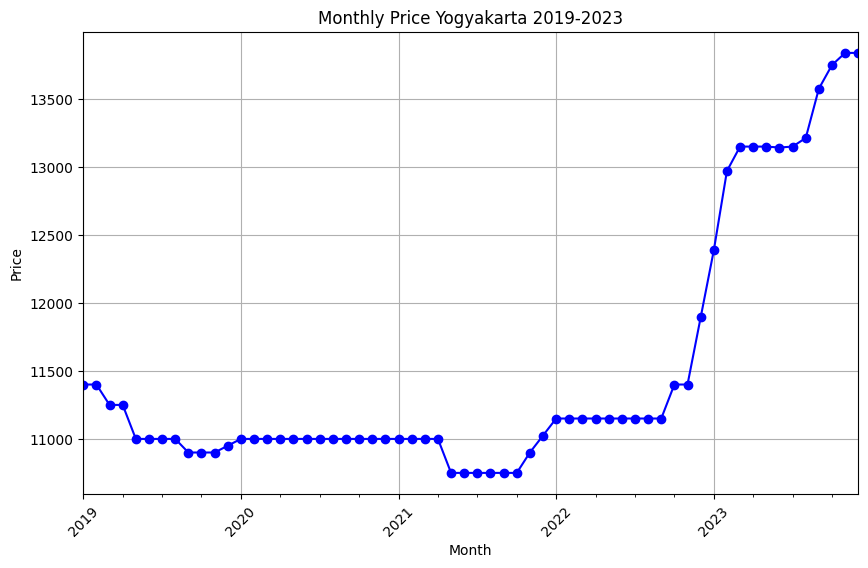

In [25]:
# Plot Harga Beras di Yogyakarta
monthly_price_yog = df.groupby(df['Tanggal5'].dt.to_period('M'))['Yogyakarta '].sum()
plt.figure(figsize=(10, 6))
monthly_price_yog.plot(kind='line', marker='o', color='b')
plt.title('Monthly Price Yogyakarta 2019-2023')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

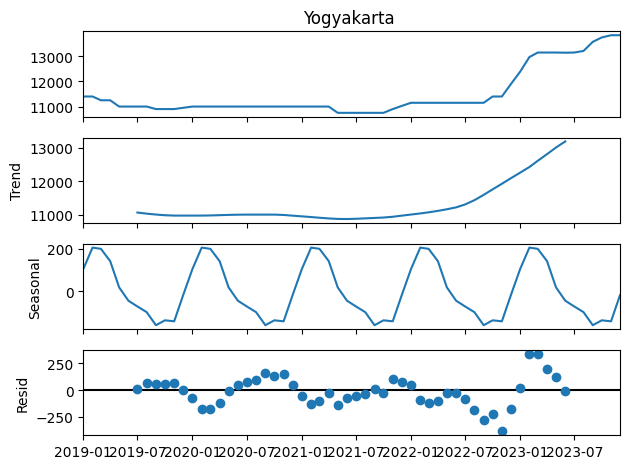

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
df.set_index('Tanggal5', inplace=True)

# Fokus pada data Yogyakarta 
yogyakarta = df['Yogyakarta ']

# Decompose data
result = seasonal_decompose(yogyakarta)

# Plot hasil decomposition
result.plot()
plt.show()

c:\Users\naila\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


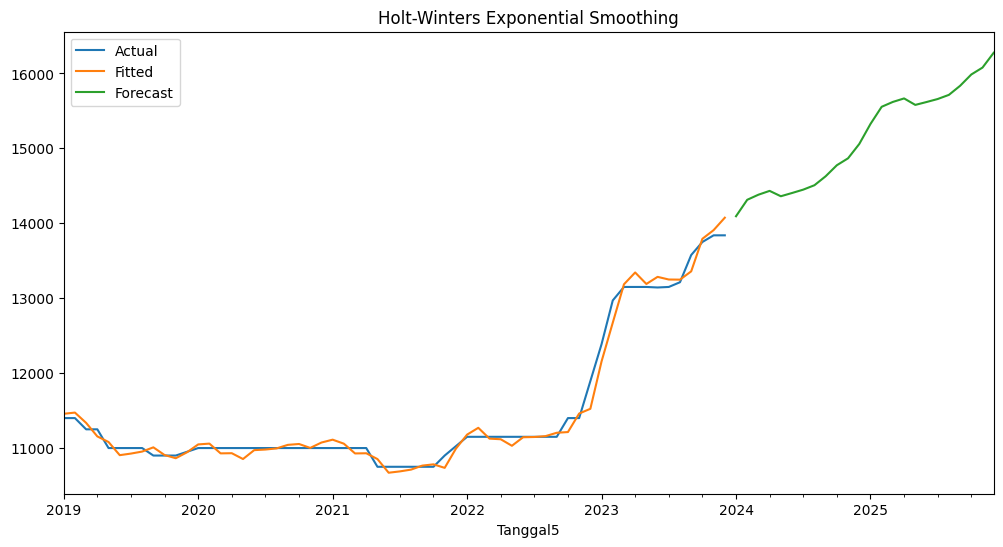

In [27]:
# Split data untuk training
train = yogyakarta.iloc[:60]

# Model Holt-Winters
model = ExponentialSmoothing(
    train,
    seasonal='mul',  # Gunakan 'add' atau 'mul'
    seasonal_periods=12,
    trend= 'add'
).fit()

# Plot
plt.figure(figsize=(12, 6))
train.plot(label='Actual', legend=True)
model.fittedvalues.plot(label='Fitted', legend=True)
model.forecast(24).plot(label='Forecast', legend=True)
plt.title("Holt-Winters Exponential Smoothing")
plt.show()

In [28]:
# Menghitung nilai fitted dan actual
fitted_values = model.fittedvalues
actual_values = train

# Menghitung MAPE
mape = np.mean(np.abs((actual_values - fitted_values) / actual_values)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 0.69%


In [29]:
# Forecast untuk 24 bulan ke depan
forecast_values = model.forecast(24)

# Print hasil forecast
print("Forecast untuk 24 bulan ke depan:")
print(forecast_values)

Forecast untuk 24 bulan ke depan:
2024-01-01    14093.707232
2024-02-01    14313.217351
2024-03-01    14381.181488
2024-04-01    14432.243954
2024-05-01    14360.577115
2024-06-01    14403.904786
2024-07-01    14448.803153
2024-08-01    14507.578896
2024-09-01    14627.125012
2024-10-01    14774.382268
2024-11-01    14867.075599
2024-12-01    15058.092272
2025-01-01    15324.906220
2025-02-01    15554.555576
2025-03-01    15619.464667
2025-04-01    15666.070677
2025-05-01    15579.592401
2025-06-01    15618.009596
2025-07-01    15658.197460
2025-08-01    15713.481477
2025-09-01    15834.600528
2025-10-01    15985.681165
2025-11-01    16077.702840
2025-12-01    16276.009426
Freq: MS, dtype: float64


## Jawa Timur

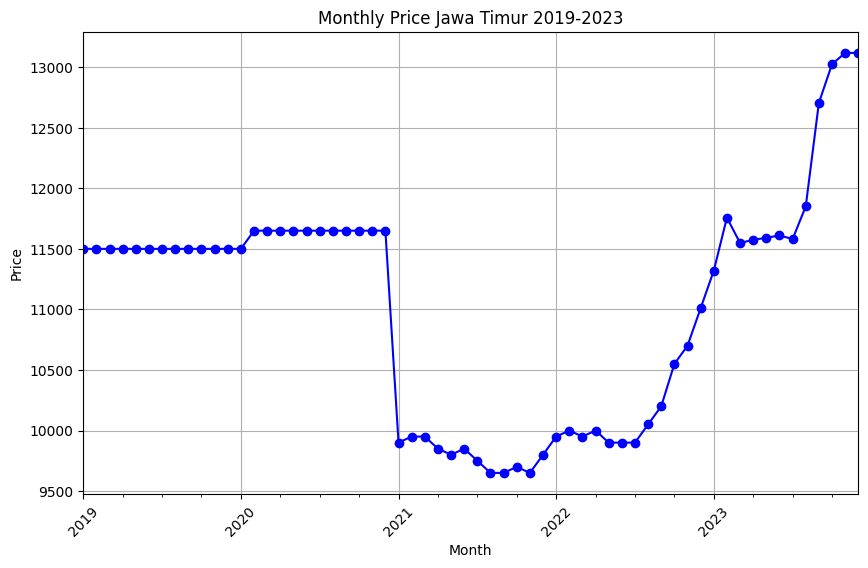

In [30]:
# Plot Harga Beras di Jawa Timur
monthly_price_jat = df.groupby(df['Tanggal6'].dt.to_period('M'))['Jatim'].sum()
plt.figure(figsize=(10, 6))
monthly_price_jat.plot(kind='line', marker='o', color='b')
plt.title('Monthly Price Jawa Timur 2019-2023')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

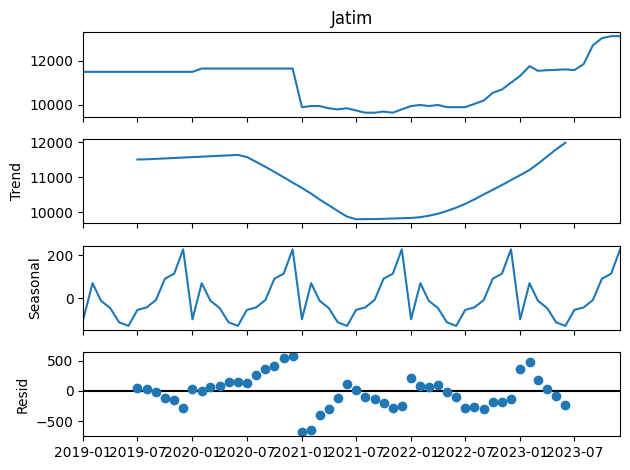

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
df.set_index('Tanggal6', inplace=True)

# Fokus pada data Jawa Timur
jatim = df['Jatim']

# Decompose data
result = seasonal_decompose(jatim)

# Plot hasil decomposition
result.plot()
plt.show()

c:\Users\naila\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


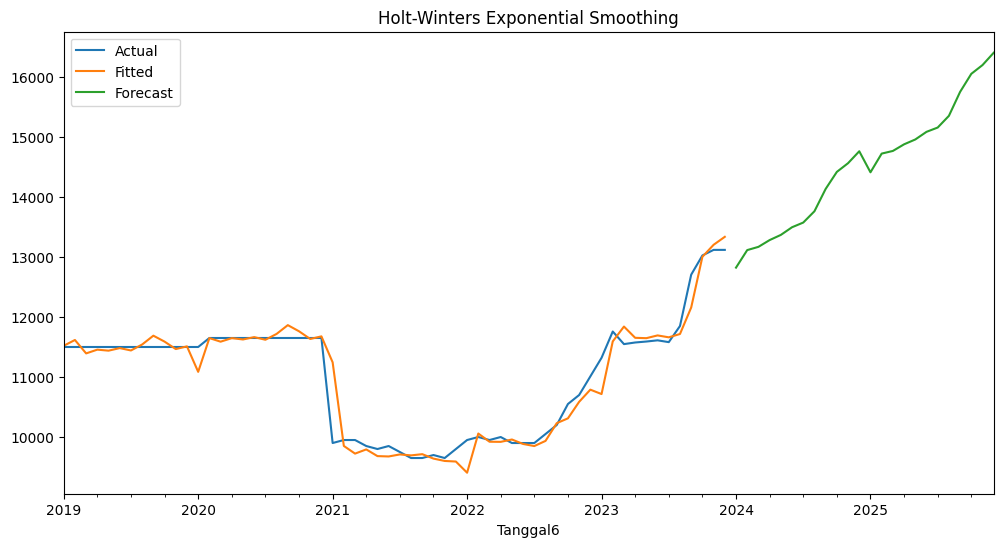

In [38]:
# Split data untuk training
train = jatim.iloc[:60]

# Model Holt-Winters
model = ExponentialSmoothing(
    train,
    seasonal='mul',  # Gunakan 'add' atau 'mul'
    seasonal_periods=12,
    trend='add'
).fit()

# Plot
plt.figure(figsize=(12, 6))
train.plot(label='Actual', legend=True)
model.fittedvalues.plot(label='Fitted', legend=True)
model.forecast(24).plot(label='Forecast', legend=True)
plt.title("Holt-Winters Exponential Smoothing")
plt.show()

In [40]:
# Menghitung nilai fitted dan actual
fitted_values = model.fittedvalues
actual_values = train

# Menghitung MAPE
mape = np.mean(np.abs((actual_values - fitted_values) / actual_values)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 1.26%


In [41]:
# Forecast untuk 24 bulan ke depan
forecast_values = model.forecast(24)

# Print hasil forecast
print("Forecast untuk 24 bulan ke depan:")
print(forecast_values)

Forecast untuk 24 bulan ke depan:
2024-01-01    12822.432916
2024-02-01    13114.489821
2024-03-01    13168.470700
2024-04-01    13281.269851
2024-05-01    13367.406381
2024-06-01    13495.225614
2024-07-01    13573.204881
2024-08-01    13761.557291
2024-09-01    14133.663537
2024-10-01    14417.660179
2024-11-01    14562.445177
2024-12-01    14761.088195
2025-01-01    14410.672546
2025-02-01    14722.308900
2025-03-01    14766.580584
2025-04-01    14876.931605
2025-05-01    14957.496946
2025-06-01    15084.763965
2025-07-01    15156.388401
2025-08-01    15351.258362
2025-09-01    15750.782272
2025-10-01    16051.692734
2025-11-01    16197.445051
2025-12-01    16403.028317
Freq: MS, dtype: float64
